Code to achieve a completely uncorrelated distribution of the parameters on the chip.
There are 16 resonators in total
In our case the parameters are (all lengths in microns):
1. frequency (inverse length), evenly spaced from 5-11 GHz
2. w+2s, with values: 10, sqrt(2)*10, 20, sqrt(2)*20
3. w/s, with values: 1/sqrt(2), 1, sqrt(2), 2
4. hole separation: / (no holes), 10, 100
5. location on the chip, enumerated 1-16


In [1]:
!pip install pandas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rd

In [3]:
p = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16] #position
f= np.linspace(5,11,16) #frequency in GHz
w2s= [10, 10*np.sqrt(2), 20, 20*np.sqrt(2)] #w+2s length
w2s_full= np.tile(w2s, 4) 
wsr= [1/np.sqrt(2), 1, np.sqrt(2), 2] #w/s ratio
wsr_full= np.tile(wsr,4)
h = [0, 1/10, 1/100] #hole denisty: 1/distance of holes in the horizontal part of the resonator core.
h_full= np.append(np.tile(h,5), h[2])   #here I have chosen for the value 1/100 to be included once more than the others
                                        #0 in this case refers to no holes at all (infinite separation).
p2=np.square(p)
f2=np.square(f)
w2s_full2=np.square(w2s_full)
wsr_full2=np.square(wsr_full)
h_full2=np.square(h_full)
    
print(p)
print(f)
print(w2s_full)
print(wsr_full)
print(h_full)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
[ 5.   5.4  5.8  6.2  6.6  7.   7.4  7.8  8.2  8.6  9.   9.4  9.8 10.2
 10.6 11. ]
[10.         14.14213562 20.         28.28427125 10.         14.14213562
 20.         28.28427125 10.         14.14213562 20.         28.28427125
 10.         14.14213562 20.         28.28427125]
[0.70710678 1.         1.41421356 2.         0.70710678 1.
 1.41421356 2.         0.70710678 1.         1.41421356 2.
 0.70710678 1.         1.41421356 2.        ]
[0.   0.1  0.01 0.   0.1  0.01 0.   0.1  0.01 0.   0.1  0.01 0.   0.1
 0.01 0.01]


Correlation coefficient 1.1082358768665135
       0     1          2         3     4
0    1.0   7.8  10.000000  2.000000  0.01
1    2.0  10.6  28.284271  1.000000  0.00
2    3.0   5.4  14.142136  1.414214  0.01
3    4.0   9.0  28.284271  2.000000  0.10
4    5.0   7.4  10.000000  0.707107  0.10
5    6.0   5.8  28.284271  0.707107  0.01
6    7.0   8.6  14.142136  1.414214  0.10
7    8.0   7.0  10.000000  2.000000  0.01
8    9.0  11.0  10.000000  1.000000  0.00
9   10.0   6.2  20.000000  0.707107  0.00
10  11.0   8.2  20.000000  2.000000  0.01
11  12.0   9.4  28.284271  1.414214  0.00
12  13.0  10.2  14.142136  0.707107  0.10
13  14.0   5.0  20.000000  1.000000  0.10
14  15.0   9.8  14.142136  1.000000  0.01
15  16.0   6.6  20.000000  1.414214  0.00
          0         1         2         3         4
0  1.000000  0.002941  0.007357 -0.232970 -0.006160
1  0.002941  1.000000 -0.002566 -0.008760 -0.015401
2  0.007357 -0.002566  1.000000 -0.045485 -0.106939
3 -0.232970 -0.008760 -0.045485  1.

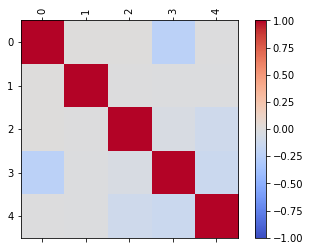

In [4]:
cc=10
while cc > 1.2:
    data = np.zeros((16,5))
    data[:,0] = p

    rd.shuffle(f)
    data[:,1] = f

    rd.shuffle(w2s_full)
    data[:,2] = w2s_full

    rd.shuffle(wsr_full)
    data[:,3] = wsr_full

    rd.shuffle(h_full)
    data[:,4] = h_full

    df = pd.DataFrame(data)

    corr = df.corr()
    cc=0
    for i in range(0,len(data[0])):
        for j in range(0,len(data[0])):
            if i != j:
                cc += abs(corr.iloc[i,j])

print("Correlation coefficient", cc)
print(df)
print(corr)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

The following cell contains the code that uncorrelates the parameters not only linearly but also quadratically!

Correlation coefficient 10.695522591637273
       0     1          2         3     4      5       6      7    8       9
0    1.0   8.2  10.000000  2.000000  0.01  196.0  112.36  200.0  4.0  0.0100
1    2.0   8.6  28.284271  1.000000  0.01  100.0  121.00  800.0  2.0  0.0001
2    3.0   9.8  20.000000  1.000000  0.00   36.0   67.24  400.0  1.0  0.0100
3    4.0   9.0  14.142136  1.414214  0.10   49.0   88.36  400.0  0.5  0.0001
4    5.0   5.0  28.284271  1.000000  0.10   25.0   25.00  200.0  4.0  0.0000
5    6.0   7.0  20.000000  1.414214  0.00  256.0   29.16  100.0  0.5  0.0000
6    7.0  10.6  20.000000  1.414214  0.01    1.0   96.04  400.0  1.0  0.0001
7    8.0   5.8  28.284271  2.000000  0.10    9.0   43.56  400.0  0.5  0.0100
8    9.0   6.6  10.000000  2.000000  0.01    4.0   38.44  100.0  0.5  0.0001
9   10.0   6.2  10.000000  0.707107  0.01  144.0  104.04  100.0  2.0  0.0001
10  11.0   5.4  14.142136  0.707107  0.01   64.0   81.00  800.0  1.0  0.0100
11  12.0  11.0  14.142136  0.7071

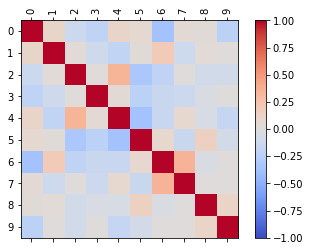

In [6]:
cc=100
while cc > 11.5:
    data = np.zeros((16,10))

    data[:,0] = p

    rd.shuffle(f)
    data[:,1] = f

    rd.shuffle(w2s_full)
    data[:,2] = w2s_full

    rd.shuffle(wsr_full)
    data[:,3] = wsr_full
    
    rd.shuffle(h_full)
    data[:,4] = h_full
    
    rd.shuffle(p2)
    data[:,5] = p2
    
    rd.shuffle(f2)
    data[:,6] = f2
    
    rd.shuffle(w2s_full2)
    data[:,7] = w2s_full2
    
    rd.shuffle(wsr_full2)
    data[:,8] = wsr_full2
    
    rd.shuffle(h_full2)
    data[:,9] = h_full2
   
    df = pd.DataFrame(data)
    corr = df.corr()
    cc=0
    for i in range(0,len(data[0])):
        for j in range(0,len(data[0])):
            if i != j:
                cc += abs(corr.iloc[i,j])

print("Correlation coefficient", cc)
print(df)
print(corr)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()